### Author: Mitchell Krystofiak
### Class: COSC 311 - Lab4
### Date: November 5, 2021
### Description: Working with the adults dataset and probability.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stats
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) #don't question this

In [2]:
adults = pd.read_csv('./adult.data', skipinitialspace=True, header=None, names = ['age','workclass','fnlwgt','education',
                     'education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss',
                     'hours-per-week','native-country','income'])

In [3]:
adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### B i. Find the 25%, 50%, and 75% quantiles of adults education num.

In [4]:
ednum = sorted(adults['education-num'])

In [5]:
q25 = np.quantile(ednum, .25)
q50 = np.quantile(ednum, .50)
q75 = np.quantile(ednum, .75)
print(f"25% quantile: {q25}, 50% quantile: {q50}, 75% quantile: {q75}")

25% quantile: 9.0, 50% quantile: 10.0, 75% quantile: 12.0


### B ii. What is the probability that an adult makes more that 50K given their education num is in each of the quantiles?

In [6]:
# Probability( > 50K, adult is in 0-.25, .25-.5, .5-.75, .75-1)
# P(A|B) = P(A,B)/P(B)

ednum_income = adults[['education-num','income']]
prob1count = ednum_income[(ednum_income['income'] == '>50K') & (ednum_income['education-num'] <= q25)].groupby(by='education-num').count().sum()
q1count = ednum_income[(ednum_income['education-num'] <= q25)].count().sum()
print(f"P(>50K | in 1st quartile of education-num) = {prob1count['income']/q1count}")

prob2count = ednum_income[(ednum_income['income'] == '>50K') & (ednum_income['education-num'] > q25) & (ednum_income['education-num'] <= q50)].groupby(by='education-num').count().sum()
q2count = ednum_income[(ednum_income['education-num'] > q25) & (ednum_income['education-num'] <= q50)].count().sum()
print(f"P(>50K | in 2nd quartile of education-num) = {prob2count['income']/q2count}")

prob3count = ednum_income[(ednum_income['income'] == '>50K') & (ednum_income['education-num'] > q50) & (ednum_income['education-num'] <= q75)].groupby(by='education-num').count().sum()
q3count = ednum_income[(ednum_income['education-num'] > q50) & (ednum_income['education-num'] <= q75)].count().sum()
print(f"P(>50K | in 3rd quartile of education-num) = {prob3count['income']/q3count}")

prob4count = ednum_income[(ednum_income['income'] == '>50K') & (ednum_income['education-num'] > q75)].groupby(by='education-num').count().sum()
q4count = ednum_income[(ednum_income['education-num'] > q75)].count().sum()
print(f"P(>50K | in 4th quartile of education-num) = {prob4count['income']/q4count}")


P(>50K | in 1st quartile of education-num) = 0.06503321133251999
P(>50K | in 2nd quartile of education-num) = 0.09511726786449047
P(>50K | in 3rd quartile of education-num) = 0.1278072682727644
P(>50K | in 4th quartile of education-num) = 0.24228337671997024


### B iii. Plot the change in probability that a person makes more and less than 50K given years of education.

Text(0, 0.5, 'Probability of making >50K')

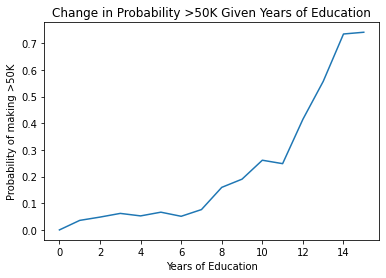

In [7]:
gt50 = ednum_income[ednum_income['income'] == '>50K']
lt50 = ednum_income[ednum_income['income'] == '<=50K']

numed = gt50.groupby(by='education-num').count()
ed_num = ednum_income.groupby(by='education-num').count()
numed = numed.reset_index()
ed_num = ed_num.reset_index()

first = [i[1]['income'] for i in numed.iterrows()]
second = [i[1]['income'] for i in ed_num.iterrows()]
first.insert(0,0) #fix different parameters

y = [i / j for i,j in zip(first,second)]
x = [i for i in range(0, max(ednum_income['education-num']))]

plt.plot(x, y)
plt.title("Change in Probability >50K Given Years of Education")
plt.xlabel("Years of Education")
plt.ylabel("Probability of making >50K")

Text(0, 0.5, 'Probability of making <=50K')

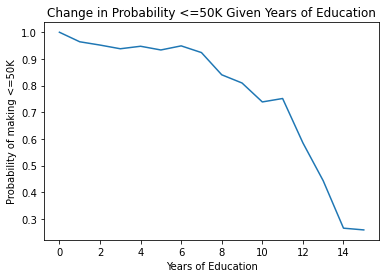

In [8]:
numed = lt50.groupby(by='education-num').count()
ed_num = ednum_income.groupby(by='education-num').count()
numed = numed.reset_index()
ed_num = ed_num.reset_index()

first = [i[1]['income'] for i in numed.iterrows()]
second = [i[1]['income'] for i in ed_num.iterrows()]

y = [i / j for i,j in zip(first,second)]
x = [i for i in range(0, max(ednum_income['education-num']))]

plt.plot(x, y)
plt.title("Change in Probability <=50K Given Years of Education")
plt.xlabel("Years of Education")
plt.ylabel("Probability of making <=50K")

### B iv. Covariance between the education num and number of hours worked per week.

In [9]:
ednum = adults['education-num']
hrspw = adults['hours-per-week']

In [10]:
np.cov(ednum, hrspw)

array([[  6.61888991,   4.70533794],
       [  4.70533794, 152.45899505]])

In the above covariance matrix, we have the diagonal representing the variance of the education num and the hours worked per week. The other two values represent the covariance between x and y, or y and x, which are the same thing. The variance of the education num is 6.62 and the variance of the number of hours worked per week is 152.46. The covariance beetween the two is 4.71, which indicates there is a positive relationship between the two columns of adults data.

### B v. Create a boxplot illustrating the spread of hours worked among adults who make more and less than 50K.

Text(0, 0.5, 'Number of Hours Worked')

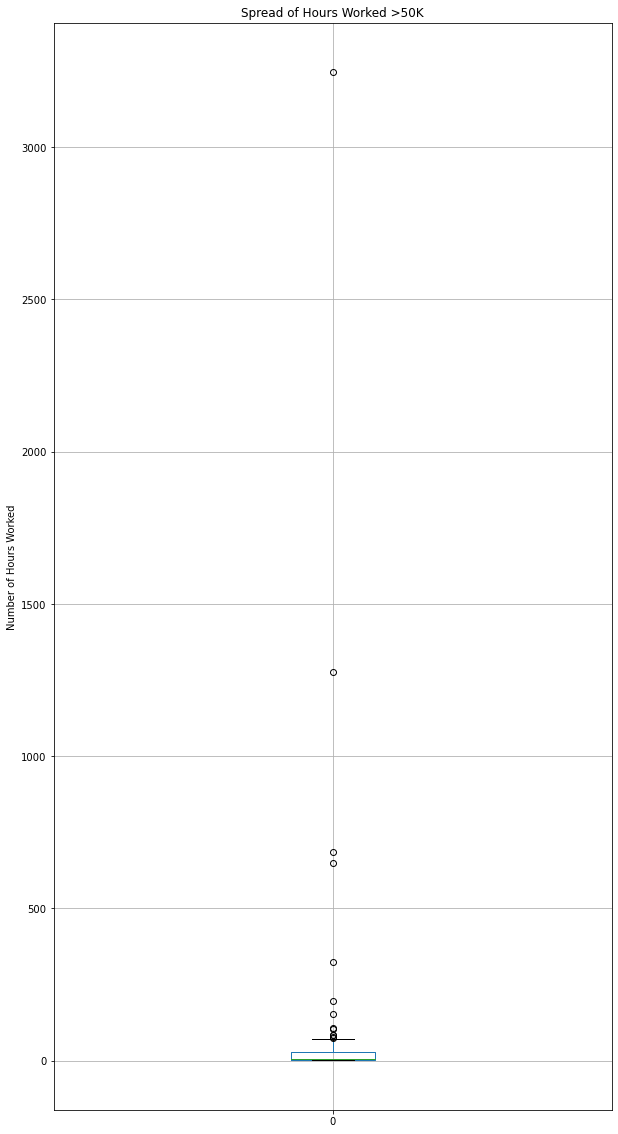

In [11]:
gt50 = adults[['hours-per-week', 'income']][adults['income'] == '>50K']
lt50 = adults[['hours-per-week', 'income']][adults['income'] == '<=50K']

gt50 = gt50.groupby(by='hours-per-week').count()
lt50 = lt50.groupby(by='hours-per-week').count()

x = [i[1] for i in gt50.reset_index().values]
y = [i[1] for i in lt50.reset_index().values]

pd.DataFrame(x).boxplot(figsize=(10,20))
plt.title("Spread of Hours Worked >50K")
plt.ylabel("Number of Hours Worked")

Text(0, 0.5, 'Number of Hours Worked')

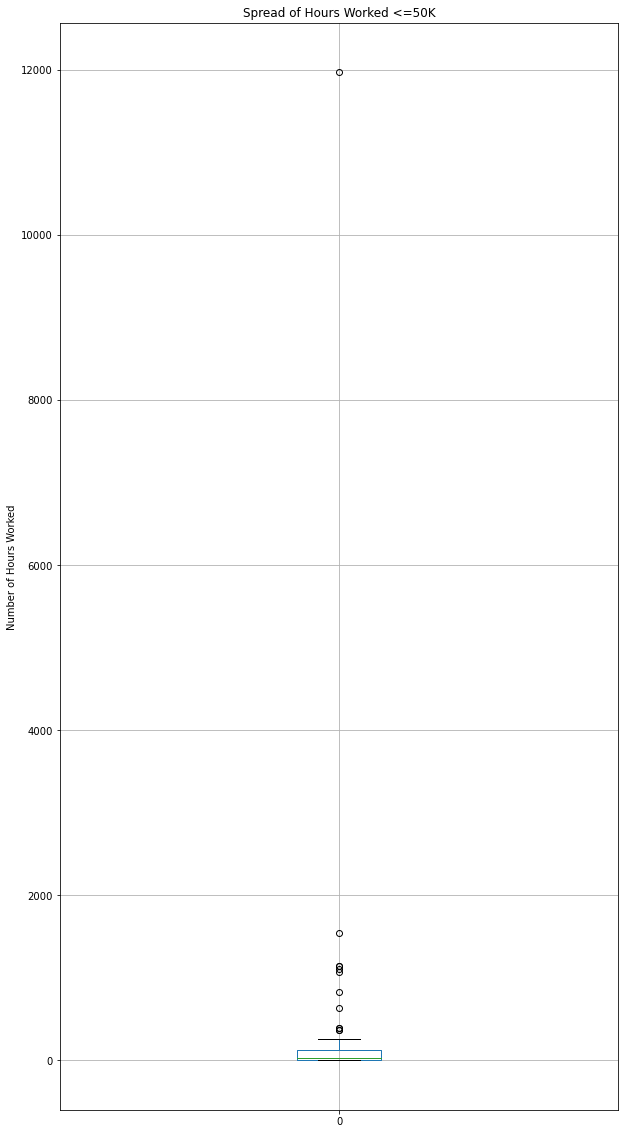

In [12]:
pd.DataFrame(y).boxplot(figsize=(10,20))
plt.title("Spread of Hours Worked <=50K")
plt.ylabel("Number of Hours Worked")

### B vi. Create a boxplot of the spread of hours worked among adults from each native country who make more or less than 50K.


?                          AxesSubplot(0.1,0.808537;0.114286x0.0914634)
Cambodia              AxesSubplot(0.237143,0.808537;0.114286x0.0914634)
Canada                AxesSubplot(0.374286,0.808537;0.114286x0.0914634)
China                 AxesSubplot(0.511429,0.808537;0.114286x0.0914634)
Columbia              AxesSubplot(0.648571,0.808537;0.114286x0.0914634)
Cuba                  AxesSubplot(0.785714,0.808537;0.114286x0.0914634)
Dominican-Republic          AxesSubplot(0.1,0.69878;0.114286x0.0914634)
Ecuador                AxesSubplot(0.237143,0.69878;0.114286x0.0914634)
El-Salvador            AxesSubplot(0.374286,0.69878;0.114286x0.0914634)
England                AxesSubplot(0.511429,0.69878;0.114286x0.0914634)
France                 AxesSubplot(0.648571,0.69878;0.114286x0.0914634)
Germany                AxesSubplot(0.785714,0.69878;0.114286x0.0914634)
Greece                     AxesSubplot(0.1,0.589024;0.114286x0.0914634)
Guatemala             AxesSubplot(0.237143,0.589024;0.114286x0.0

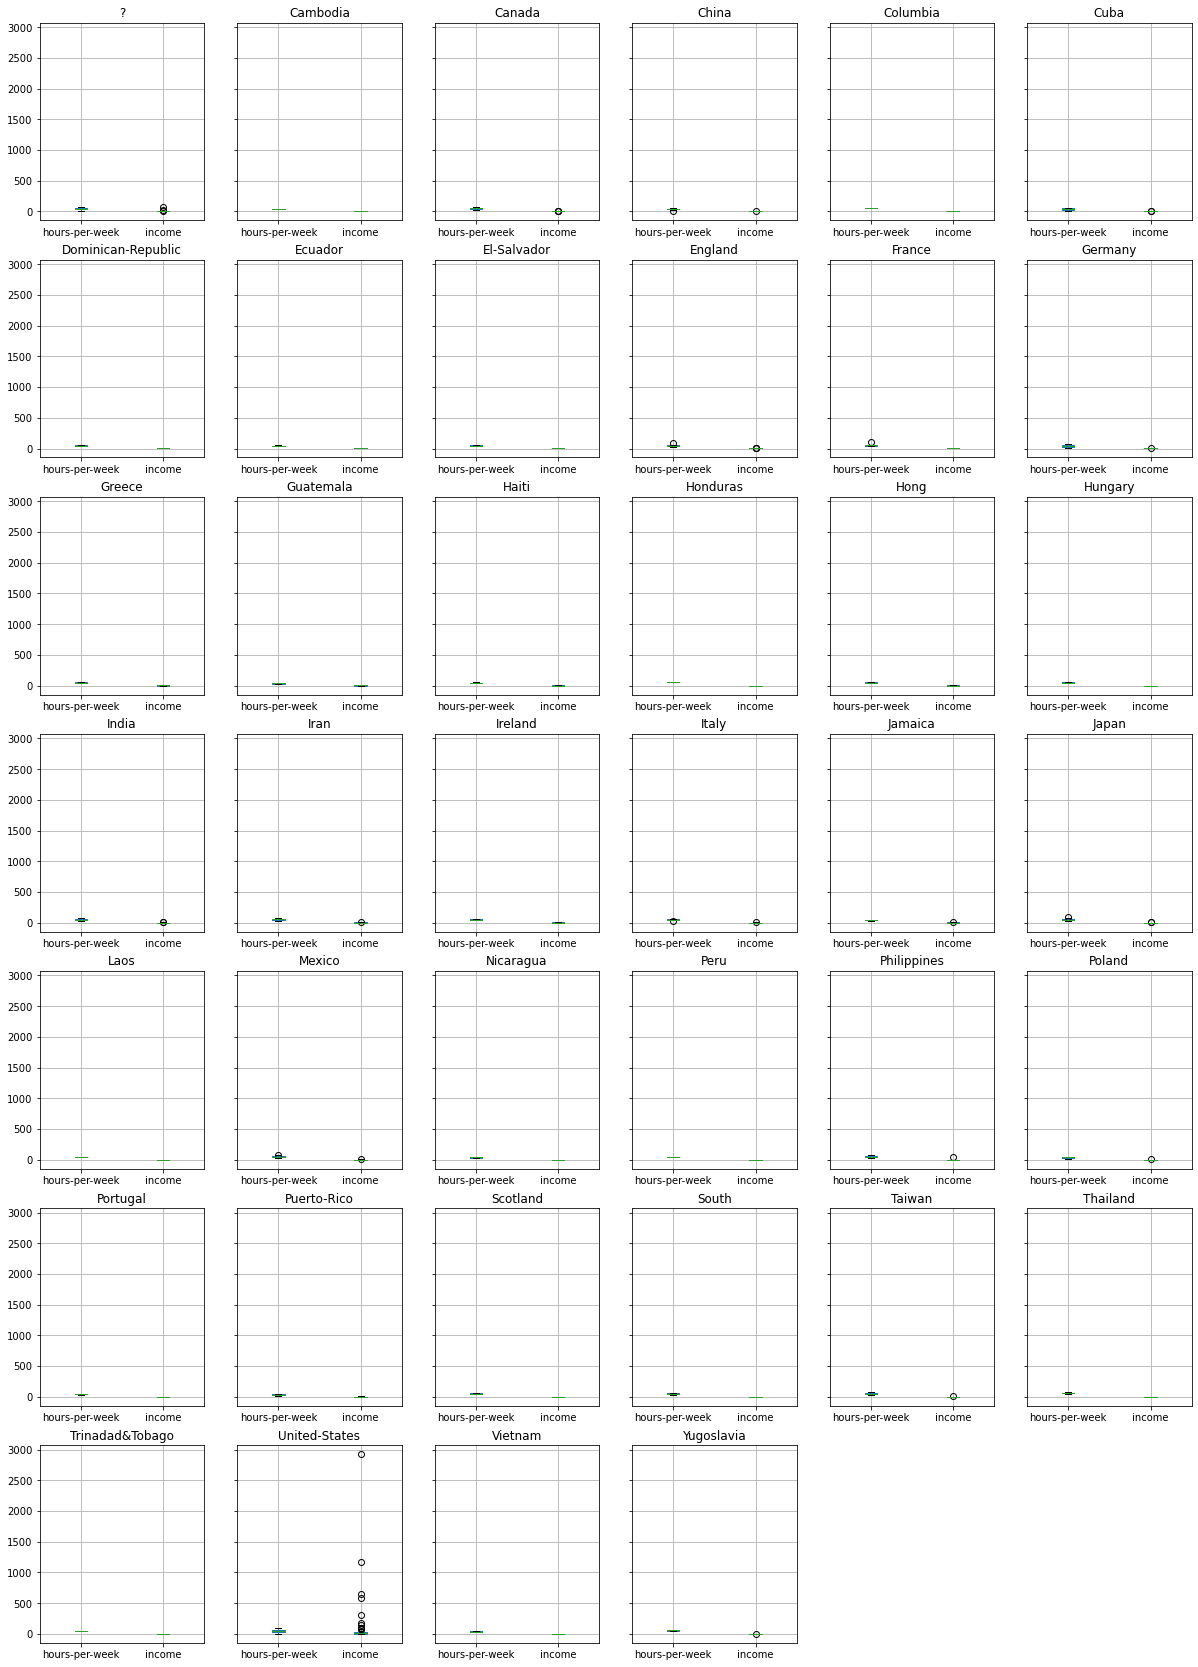

In [13]:
# not very nice unless we blow up the plots or narrow in on one
gt50 = adults[['hours-per-week','native-country','income']][adults['income'] == '>50K']
lt50 = adults[['hours-per-week','native-country','income']][adults['income'] == '<=50K']
gt50 = gt50.groupby(by=['native-country','hours-per-week']).count().reset_index().groupby(by='native-country')
lt50 = lt50.groupby(by=['native-country','hours-per-week']).count().reset_index().groupby(by='native-country')
gt50.boxplot(figsize=(20,30))

### V ii. Create a table where (x,y) contains the P(A adult has education x | has education-num y).

In [101]:
#P(A ed x | ed num y) = P(A ed x, ed num y)/P(ed num y)

data = adults[['education','education-num','income']]
c_ed_to_num = data.groupby(['education','education-num']).count().reset_index()
c_num_to_ed = data.groupby(['education-num','education']).count().reset_index()
types_ed = [i[0] for i in c_ed_to_num.groupby('education').count().iterrows()] #10th, 11th ...
types_ed_num = [i[0] for i in c_num_to_ed.groupby('education-num').count().iterrows()] #1,2,3,4,...,16
c_ed_num = data.groupby('education-num').count() #dataframe of counts
v_ed_num = [i[1]['income'] for i in c_ed_num.iterrows()] #just the counts of c_ed_num

def level_given_num(a,b):
    val = c_ed_to_num[(c_ed_to_num['education'] == a) & (c_ed_to_num['education-num'] == b)]['income'].values[0] \
          if c_ed_to_num[(c_ed_to_num['education'] == a) & (c_ed_to_num['education-num'] == b)]['income'].values else 0
    index = 0
    for i in types_ed_num:
        if (types_ed_num[index] == b):
            index = i
            break
        else:
            index += 1
    if (val == 0 or index == 16):
        return val
    else:
        return val/v_ed_num[index]
    

table1 = np.array([ [level_given_num(a,b) for a in types_ed] for b in types_ed_num])
pd.DataFrame(table1, columns=types_ed, index=types_ed_num)


,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.303571,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.504505,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.51548,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.00000,1.256809,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.550911,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.794043,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,2.713626,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.041234,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,1.440269,0.000000,0.000000,0.000000,0.000000
10,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.275687


### B viii. Create a table where entry (x,y) contains the conditional probability of having marital status x given that they have occupation y.

In [140]:
#P(A MS x | OC y) = P(A MS x, OC y)/P(OC y)

data = adults[['marital-status','occupation','income']]
ms_to_occ = data.groupby(['marital-status','occupation']).count().reset_index()
occ_to_ms = data.groupby(['occupation','marital-status']).count().reset_index()
types_ms = [i[0] for i in ms_to_occ.groupby('marital-status').count().iterrows()]
types_oc = [i[0] for i in occ_to_ms.groupby('occupation').count().iterrows()]
c_occ = data.groupby('occupation').count()
v_occ = [i[1]['income'] for i in c_occ.iterrows()]

def level_given_num1(a,b):
    val = ms_to_occ[(ms_to_occ['marital-status'] == a) & (ms_to_occ['occupation'] == b)]['income'].values[0] \
          if ms_to_occ[(ms_to_occ['marital-status'] == a) & (ms_to_occ['occupation'] == b)]['income'].values else 0
    index = 0
    for i in types_oc:
        count = 0
        if (i == b):
            index = count
            break
        else:
            count += 1         
    if (val == 0 or index == 14):
        return val
    else:
        return val/v_occ[index]

table2 = np.array([ [level_given_num1(a,b) for a in types_ms] for b in types_oc])
pd.DataFrame(table2, columns=types_ms, index=types_oc)

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
?,0.100380,0.001085,0.345632,0.015735,0.418340,0.035811,0.083017
Adm-clerical,0.444384,0.002713,0.534997,0.032013,0.863266,0.079761,0.088443
Armed-Forces,0.000000,0.000000,0.001628,0.000000,0.003256,0.000000,0.000000
Craft-repair,0.251763,0.001628,1.391210,0.028215,0.473142,0.055887,0.022246
Exec-managerial,0.327727,0.000543,1.326099,0.016820,0.433532,0.051004,0.050461
Farming-fishing,0.034726,0.000543,0.311991,0.013022,0.156810,0.009767,0.012480
Handlers-cleaners,0.069452,0.000000,0.253391,0.012480,0.377645,0.020619,0.009767
Machine-op-inspct,0.150298,0.000000,0.537710,0.014107,0.309821,0.045578,0.028757
Other-service,0.271839,0.002170,0.392295,0.032013,0.890396,0.103093,0.096039
Priv-house-serv,0.015193,0.000000,0.008681,0.002170,0.036354,0.006511,0.011937


### B ix. What is the conditional probabillity of making more or less than 50K given that a person works in each different occupation?

In [155]:
data = adults[['occupation','income']]
gt = data[data['income'] == '>50K'].groupby('occupation').count().reset_index()
gt_c = data.groupby('occupation').count().reset_index()
gt_t = [i[1]['income'] for i in gt.iterrows()]
gt_b = [i[1]['income'] for i in gt_c.iterrows()]
values1 = [i / j for i,j in zip(gt_t, gt_b)]
types_oc1 = [i[1]['occupation'] for i in gt.iterrows()]
g = []


lt = data[data['income'] == '<=50K'].groupby('occupation').count().reset_index()
lt_c = data.groupby('occupation').count().reset_index()
lt_t = [i[1]['income'] for i in lt.iterrows()]
lt_b = [i[1]['income'] for i in lt_c.iterrows()]
values2 = [i/j for i,j in zip(lt_t, lt_b)]
types_oc2 = [i[1]['occupation'] for i in lt.iterrows()]
l = []

for i in range(len(values)):
    g.append({'Occupation':types_oc1[i], "Probability >50K":values1[i]})
    l.append({'Occupation':types_oc2[i], "Probability <=50K":values2[i]})
display(pd.DataFrame(g))
display(pd.DataFrame(l))


,Occupation,Probability >50K
0,?,0.103635
1,Adm-clerical,0.134483
2,Armed-Forces,0.111111
3,Craft-repair,0.226641
4,Exec-managerial,0.484014
5,Farming-fishing,0.115694
6,Handlers-cleaners,0.062774
7,Machine-op-inspct,0.124875
8,Other-service,0.041578
9,Priv-house-serv,0.006711


,Occupation,Probability <=50K
0,?,0.896365
1,Adm-clerical,0.865517
2,Armed-Forces,0.888889
3,Craft-repair,0.773359
4,Exec-managerial,0.515986
5,Farming-fishing,0.884306
6,Handlers-cleaners,0.937226
7,Machine-op-inspct,0.875125
8,Other-service,0.958422
9,Priv-house-serv,0.993289


### B x. Plot the change in probability that a person makes more and less than 50K given the amount that they work per week.

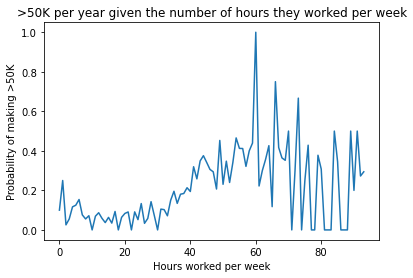

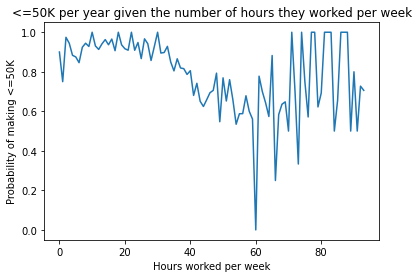

In [163]:
data = adults[['hours-per-week','income']]

gt = data[data['income'] == ">50K"].groupby('hours-per-week').count().reset_index()
gt_hrs = data.groupby('hours-per-week').count().reset_index()
gt_t = [i[1]['hours-per-week'] for i in gt.iterrows()]
gt_b = [i[1]['hours-per-week'] for i in gt_hrs.iterrows()]

tmp1 = set(gt_t)
tmp2 = set(gt_b)
tmp = tmp2.difference(tmp1)
i = sorted(tmp)
t = [(i[1]['hours-per-week'], i[1]['income']) for i in gt.iterrows()]
b = [i[1]['income'] for i in gt_hrs.iterrows()]
for i in i:
    t.append((i,0))
t.sort(key = lambda x: x[0])
t = [i[1] for i in t]

y_values = [i/j for i,j in zip(t,b)]
x_values = [i for i in range(len(y_values))]

plt.plot(x_values,y_values)
plt.title(">50K per year given the number of hours they worked per week")
plt.xlabel("Hours worked per week")
plt.ylabel("Probability of making >50K")
plt.show()

lt = data[data['income'] == "<=50K"].groupby('hours-per-week').count().reset_index()
lt_hrs = data.groupby('hours-per-week').count().reset_index()
lt_t = [i[1]['hours-per-week'] for i in lt.iterrows()]
lt_b = [i[1]['hours-per-week'] for i in lt_hrs.iterrows()]

tmp1 = set(lt_t)
tmp2 = set(lt_b)
tmp = tmp2.difference(tmp1)
i = sorted(tmp)
t = [(i[1]['hours-per-week'], i[1]['income']) for i in lt.iterrows()]
b = [i[1]['income'] for i in lt_hrs.iterrows()]
for i in i:
    t.append((i,0))
t.sort(key = lambda x: x[0])
t = [i[1] for i in t]

y_values = [i/j for i,j in zip(t,b)]
x_values = [i for i in range(len(y_values))]

plt.plot(x_values,y_values)
plt.title("<=50K per year given the number of hours they worked per week")
plt.xlabel("Hours worked per week")
plt.ylabel("Probability of making <=50K")
plt.show()